In [1]:
from scipy.stats import multivariate_normal
from matplotlib import pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

In [19]:
import matplotlib.pyplot as plt

In [37]:
p1 = multivariate_normal(mean=[2.5, 2.5], cov=[[4, 0], [0, 2]])
p2 = multivariate_normal(mean=[4.5, -1.5], cov=[[2, 1], [1, 3]])
p3 = multivariate_normal(mean=[12.5, -3.5], cov=[[9, 3], [3, 5]])

In [38]:
X_1 = p1.rvs(size=150)
X_2 = p2.rvs(size=100)
X_3 = p3.rvs(size=1000)

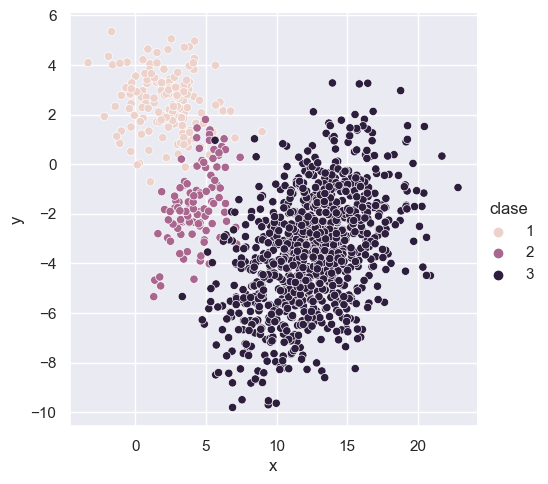

In [39]:
df = pd.DataFrame([dict(x=x, y=y, clase=1) for x, y in X_1] + \
                  [dict(x=x, y=y, clase=2) for x, y in X_2] + \
                  [dict(x=x, y=y, clase=3) for x, y in X_3])
sns.relplot(data=df, kind='scatter',
            x='x', y='y', hue='clase')
plt.show()

In [40]:
print(150+100+1000)

1250


In [41]:
X = np.concatenate((X_1, X_2, X_3))
posterior = (np.vstack([p1.pdf(X) * 150 / 1250,
                        p2.pdf(X) * 100 / 1250, 
                        p3.pdf(X) * 1000 / 1250])).T

In [42]:
evidencia = posterior.sum(axis=1)

In [43]:
posterior = posterior / np.atleast_2d(evidencia).T

In [44]:
clase = np.array([1, 2, 3])
indice = posterior.argmax(axis=1)
prediccion = clase[indice]

In [45]:
y = np.concatenate([np.ones(150), np.ones(100) + 1, np.ones(1000) + 2])

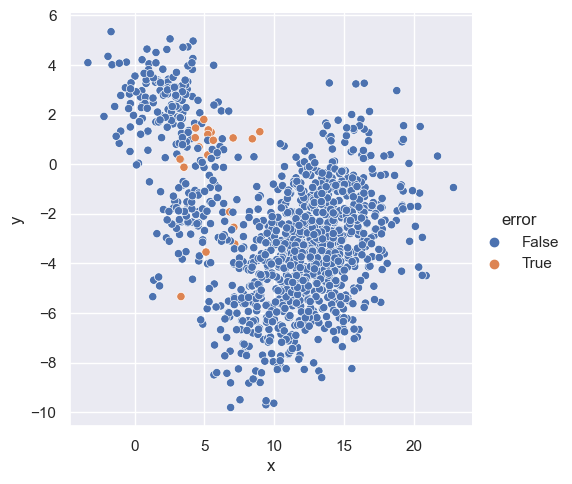

In [46]:
_ = [dict(x=x, y=y, error=error) 
     for (x, y), error in zip(X, [val != pred for val, pred in zip(y, prediccion)])]
df_error = pd.DataFrame(_)
sns.relplot(data=df_error, kind='scatter',
            x='x', y='y', hue='error')
plt.show()

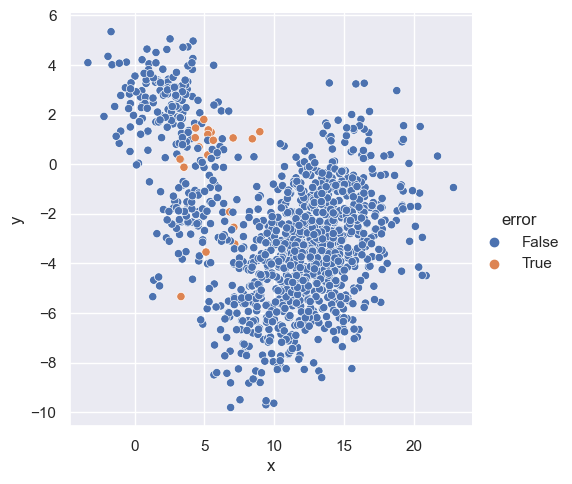

In [47]:
_ = [dict(x=x, y=y, error=error) 
     for (x, y), error in zip(X, y != prediccion)]
df_error = pd.DataFrame(_)
sns.relplot(data=df_error, kind='scatter',
            x='x', y='y', hue='error')
plt.show()

# SOLUCION

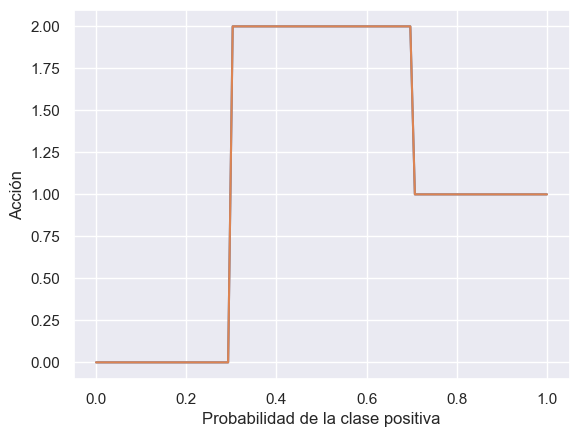

In [49]:
from matplotlib import pylab as plt
import numpy as np


def accion(prob, _lambda=1):
    "Selecciona una clase"
    if  prob < 0.5:
        # recordando que prob corresponde a la clase positiva
        # la prob de la clase negativa es:
        prob = 1 - prob
        accion = 0
    else:
        accion = 1
    # recordando que uno toma la acción solamente
    # si su probabilidad es mayor que el riesgo
    if prob > 1 - _lambda:
        return accion
    return 2


# Probabilidad de la clase positiva, es decir, clase 1.
prob_clase_positiva = np.linspace(0, 1, 100)

# Grafica
_lambda = 0.3
plt.grid()
plt.plot(prob_clase_positiva, [accion(x, _lambda) for x in prob_clase_positiva])
plt.xlabel("Probabilidad de la clase positiva")
plt.ylabel("Acción")
plt.show()

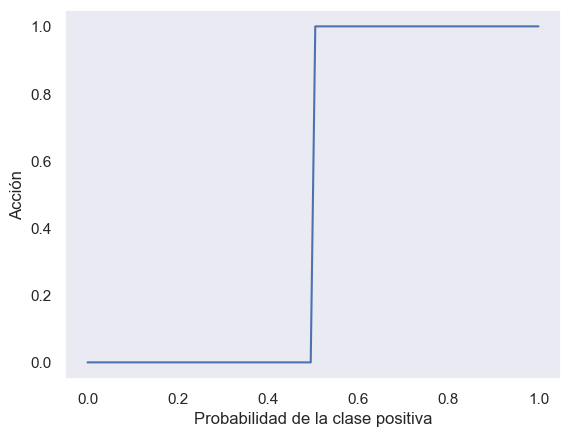

In [51]:
# Grafica
_lambda = 0.51
plt.grid()
plt.plot(prob_clase_positiva, [accion(x, _lambda) for x in prob_clase_positiva])
plt.xlabel("Probabilidad de la clase positiva")
plt.ylabel("Acción")
plt.show()

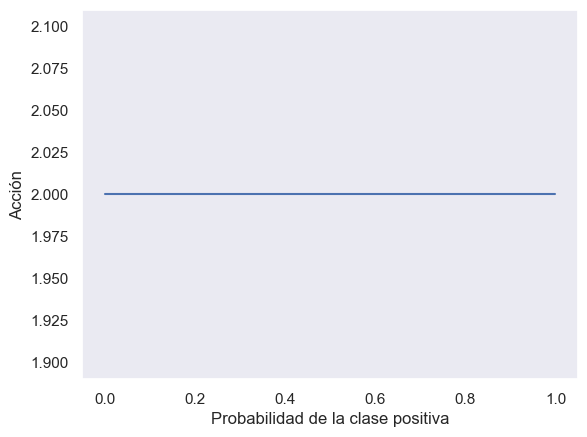

In [52]:
# Grafica
_lambda = 0.0
plt.grid()
plt.plot(prob_clase_positiva, [accion(x, _lambda) for x in prob_clase_positiva])
plt.xlabel("Probabilidad de la clase positiva")
plt.ylabel("Acción")
plt.show()

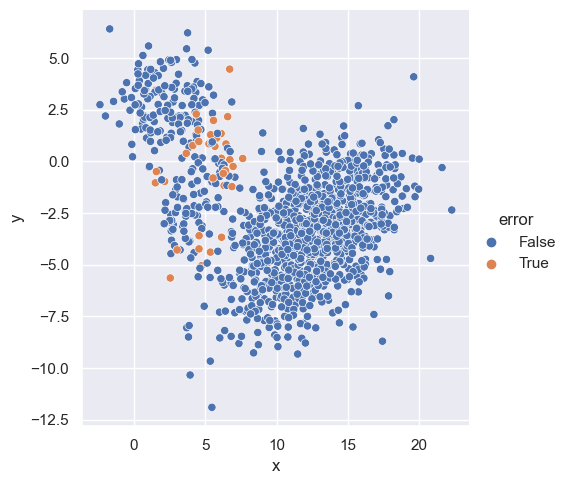

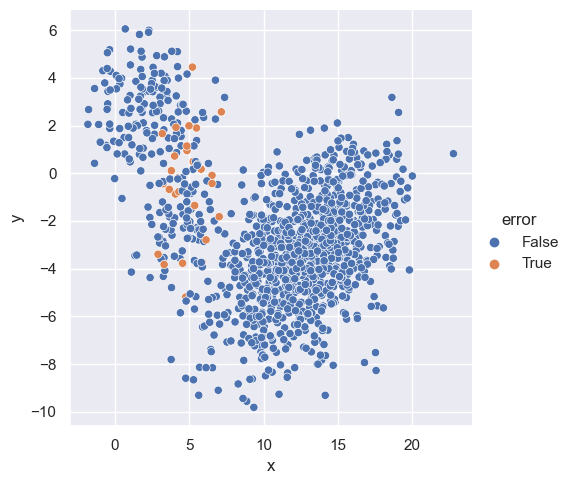

In [54]:

from scipy.stats import multivariate_normal
from matplotlib import pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()


p1 = multivariate_normal(mean=[2.5, 2.5], cov=[[4, 0], [0, 2]])
p2 = multivariate_normal(mean=[4.5, -1.5], cov=[[2, 1], [1, 3]])
# p2 = multivariate_normal(mean=[4.5, -1.5], cov=[[10, 1], [1, 3]])
# p2 = multivariate_normal(mean=[4.5, -1.5], cov=[[1, 5], [5, 35]])

p3 = multivariate_normal(mean=[12.5, -3.5], cov=[[9, 3], [3, 5]])

X_1 = p1.rvs(size=150)
X_2 = p2.rvs(size=100)
X_3 = p3.rvs(size=1000)

# df = pd.DataFrame([dict(x=x, y=y, clase=1) for x, y in X_1] + \
#                   [dict(x=x, y=y, clase=2) for x, y in X_2] + \
#                   [dict(x=x, y=y, clase=3) for x, y in X_3])
# sns.relplot(data=df, kind='scatter',
#             x='x', y='y', hue='clase')

X = np.concatenate((X_1, X_2, X_3))
posterior = np.vstack([p1.pdf(X) * 150 / 1250,
                       p2.pdf(X) * 100 / 1250, 
                       p3.pdf(X) * 1000 / 1250]).T

evidencia = posterior.sum(axis=1)
posterior = posterior / np.atleast_2d(evidencia).T

clase = np.array([1, 2, 3])
indice = posterior.argmax(axis=1)
prediccion = clase[indice]

y = np.concatenate([np.ones(150), np.ones(100) + 1, np.ones(1000) + 2])

_ = [dict(x=x, y=y, error=error) 
     for (x, y), error in zip(X, y != prediccion)]
df_error = pd.DataFrame(_)
sns.relplot(data=df_error, kind='scatter',
            x='x', y='y', hue='error')
plt.show()